## Ruokailuvälineiden tunnistus eri konvoluutioneuroverkkomalleilla

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# 🎯 Luokat
class_names = ['haarukka', 'lusikka', 'veitsi']


Datasetti on itse kerätty, ja se sisältää kuvia haarukoista, lusikoista ja veitsistä erilaisista kuvakulmista ja valaistusolosuhteista. Kuvia on 60 jokaisesta luokasta.

Kuvat on esikäsitelty seuraavasti:
- Rajaus, koon muuttaminen kokoon 224x224
- Jako kolmeen osaan:
  - Koulutusdata: 70%
  - Validointidata: 15%
  - Testidata: 15%
- Data agumentoidaan
  - Vaakasuuntainen peilaus
  - Satunnainen kierto
  - Satunnainen zoomaus


In [183]:
# Ladataan tulokset .npz-tiedostoista
CNN_data = np.load("CNN_kuvantunnistus_results.npz", allow_pickle=True)
VGG_data = np.load("VGG_kuvantunnistus_results.npz", allow_pickle=True)
VGG_fineTuned_data = np.load("VGG_FineTuned_kuvantunnistus_results.npz", allow_pickle=True)

models = {
    "CNN": CNN_data,
    "Feature Extraction (VGG16)": VGG_data,
    "Fine-tuned VGG16": VGG_fineTuned_data,
}

In [184]:
# Mallien tarkkuus testidatalla
for name, data in models.items():
    test_acc = data['test_acc']
    print(f"{name} - Test Accuracy: {test_acc:.4f}")

# Tarkistetaan, mitä history sisältää ja sen rakenne
for name, data in models.items():
    history = data['history']
    print(f"{name} - History structure:", type(history), history)


CNN - Test Accuracy: 0.4074
Feature Extraction (VGG16) - Test Accuracy: 0.7778
Fine-tuned VGG16 - Test Accuracy: 1.0000
CNN - History structure: <class 'numpy.ndarray'> {'loss': [357.5200500488281, 32.29081726074219, 4.370758533477783, 1.293781042098999, 1.0876734256744385, 1.1266744136810303, 1.0667628049850464, 1.0696537494659424, 1.0613131523132324, 0.9829437136650085, 1.0541949272155762, 1.0697561502456665, 1.0521801710128784, 0.9968881607055664, 1.0610636472702026, 0.9862268567085266, 1.0630139112472534, 1.0444676876068115, 1.0021204948425293, 1.117268681526184, 1.020885944366455, 1.0593663454055786, 1.03024423122406, 1.032548189163208, 1.036969542503357, 1.0126352310180664, 0.9752078652381897, 0.9755123257637024, 1.011853814125061, 1.4904810190200806], 'accuracy': [0.3333333432674408, 0.341269850730896, 0.3095238208770752, 0.3730158805847168, 0.4444444477558136, 0.4285714328289032, 0.4841269850730896, 0.3888888955116272, 0.3968254029750824, 0.5079365372657776, 0.460317462682724, 

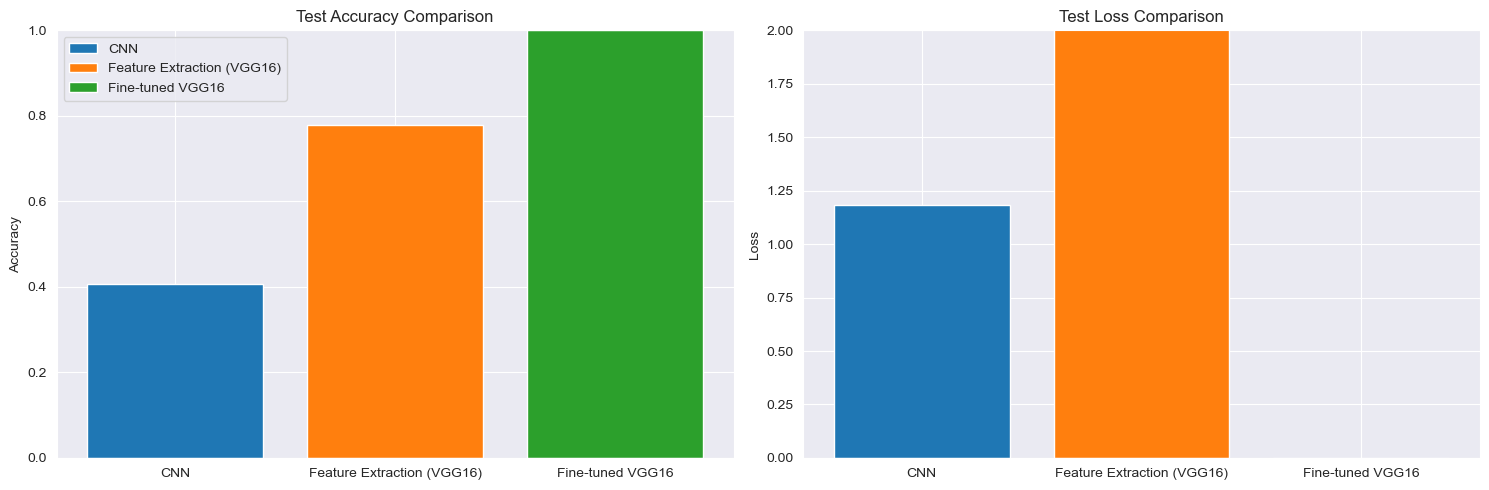

In [185]:
# Visualisoi testitulokset (test_loss ja test_acc)
plt.figure(figsize=(15, 5))

# Plot test accuracy
plt.subplot(1, 2, 1)
for name, data in models.items():
    test_acc = data['test_acc']
    plt.bar(name, test_acc, label=name)
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()

# Plot test loss
plt.subplot(1, 2, 2)
for name, data in models.items():
    test_loss = data['test_loss']
    plt.bar(name, test_loss, label=name)
plt.title("Test Loss Comparison")
plt.ylabel("Loss")
plt.ylim(0, 2)  # Assuming loss values are in this range, adjust as needed

plt.tight_layout()
plt.show()